# Second Analysis: Using Cross validation (10 fold cross validation )
# Part 1 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
df = pd.read_csv("data.csv")
cancer_df = df.copy()    # CREATING A COPY OF THE ORIGINAL DATAFRAME
print("Shape of the data : " , cancer_df.shape )
cancer_df.head(5 )


Shape of the data :  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Preprocessing

In [3]:
y = cancer_df.diagnosis.values 

cancer_df.drop(["Unnamed: 32" , "id", "diagnosis"] , axis = 1 , inplace= True ) 
X = cancer_df.values 

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaler.fit(X )
scaled_x = scaler.transform(X) 
# scaled_X is the new X 

# Cross Validation 

In [6]:
accuracy = []   # a list to store all accuracies 

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score 

# Logistic Regression 

In [8]:
log_model = LogisticRegression(solver = "liblinear") 

In [9]:
y_pred = cross_val_predict(log_model , scaled_x , y , cv = 10 ) 
accuracy_log = round(accuracy_score(y , y_pred ) *100  , 2 ) 
accuracy.append(accuracy_log)
confusion_matrix_log = confusion_matrix(y , y_pred )  
precision_score_log = precision_score(y , y_pred , average= 'weighted') * 100
recall_score_log = recall_score(y , y_pred,  average= 'weighted') * 100 
f1_score_log = f1_score(y , y_pred , average = 'weighted')  * 100 

In [10]:
print ("Confusion Matrix : " , confusion_matrix_log , sep = '\n'  , end = '\n\n') 
print("Precision score : " , precision_score_log ) 
print("Recall score : " ,  recall_score_log ) 
print("f1 score : " , f1_score_log  )

Confusion Matrix : 
[[354   3]
 [  7 205]]

Precision score :  98.24602285047057
Recall score :  98.24253075571178
f1 score :  98.23905731205346


# Decision Tree 

In [11]:
from sklearn.tree import DecisionTreeClassifier 

In [12]:
depths = [i for i in range(3, 10 )]
for depth in depths :
    tree = DecisionTreeClassifier(criterion= "entropy" , max_depth= depth , random_state= 3 ) 
    y_pred = cross_val_predict(tree , scaled_x , y , cv = 10 ) 
    print ("----  Depth : ---- " , depth ) 
    print("Accuracy Score : " , round(accuracy_score(y , y_pred ) * 100 , 2 )  )
    print("precision score : " , round(precision_score(y , y_pred , average ='weighted') * 100 , 2 ) )
    print("Recall score : " , round( recall_score(y , y_pred , average = 'weighted') * 100  , 2 ) )
    print("f1 score : " , round(f1_score(y , y_pred , average = "weighted") * 100  , 2 )) 

----  Depth : ----  3
Accuracy Score :  93.32
precision score :  93.32
Recall score :  93.32
f1 score :  93.32
----  Depth : ----  4
Accuracy Score :  93.5
precision score :  93.48
Recall score :  93.5
f1 score :  93.48
----  Depth : ----  5
Accuracy Score :  93.85
precision score :  93.86
Recall score :  93.85
f1 score :  93.85
----  Depth : ----  6
Accuracy Score :  92.97
precision score :  93.03
Recall score :  92.97
f1 score :  92.99
----  Depth : ----  7
Accuracy Score :  93.15
precision score :  93.17
Recall score :  93.15
f1 score :  93.16
----  Depth : ----  8
Accuracy Score :  93.15
precision score :  93.17
Recall score :  93.15
f1 score :  93.16
----  Depth : ----  9
Accuracy Score :  93.15
precision score :  93.17
Recall score :  93.15
f1 score :  93.16


In [13]:
# for depth = 5 , accuracy using 10-fold cross validation is 93.85 % 
accuracy.append(93.85)

# KNN 

In [14]:
from sklearn.neighbors import KNeighborsClassifier 

In [15]:
for k in range(2, 15 ) :
    knn  = KNeighborsClassifier(n_neighbors =  k ) 
    y_pred = cross_val_predict(knn , scaled_x , y , cv = 10 )
    print("---  k value : --- "  , k )
    print("Accuracy Score : " , round(accuracy_score(y , y_pred ) * 100 , 2 )  )
    print("precision score : " , round(precision_score(y , y_pred , average ='weighted') * 100 , 2 ) )
    print("Recall score : " , round( recall_score(y , y_pred , average = 'weighted') * 100  , 2 ) )
    print("f1 score : " , round(f1_score(y , y_pred , average = "weighted") * 100  , 2 ) ,end = '\n\n')     
            

---  k value : ---  2
Accuracy Score :  95.61
precision score :  95.84
Recall score :  95.61
f1 score :  95.55

---  k value : ---  3
Accuracy Score :  96.49
precision score :  96.53
Recall score :  96.49
f1 score :  96.46

---  k value : ---  4
Accuracy Score :  96.49
precision score :  96.59
Recall score :  96.49
f1 score :  96.45

---  k value : ---  5
Accuracy Score :  96.66
precision score :  96.7
Recall score :  96.66
f1 score :  96.64

---  k value : ---  6
Accuracy Score :  96.49
precision score :  96.59
Recall score :  96.49
f1 score :  96.45

---  k value : ---  7
Accuracy Score :  96.84
precision score :  96.89
Recall score :  96.84
f1 score :  96.82

---  k value : ---  8
Accuracy Score :  96.49
precision score :  96.63
Recall score :  96.49
f1 score :  96.45

---  k value : ---  9
Accuracy Score :  96.49
precision score :  96.56
Recall score :  96.49
f1 score :  96.46

---  k value : ---  10
Accuracy Score :  96.49
precision score :  96.59
Recall score :  96.49
f1 score : 

In [16]:
# for k = 7 , using 10-fold cross validation we are getting an accuracy of 96.84
accuracy.append(96.84)

# Visualization 


In [17]:
prev_accuracy = [96.28, 94.15, 99.47]
classification_model = ["log_reg" , "Dec_tree" , "KNN"]

In [18]:
test_df = pd.DataFrame({"classification_model" : classification_model , "Using cross Validation" : accuracy , "No cross validation" : prev_accuracy})
test_df 

,classification_model,Using cross Validation,No cross validation
0,log_reg,98.24,96.28
1,Dec_tree,93.85,94.15
2,KNN,96.84,99.47


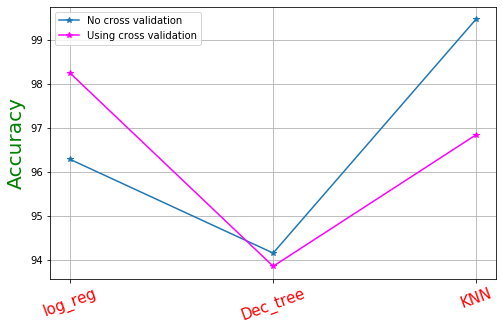

In [19]:
plt.figure(figsize= (8,5 ))
plt.plot(classification_model , prev_accuracy , marker = "*" , label = "No cross validation ")
plt.plot(classification_model , accuracy , marker = "*" , label = "Using cross validation" , color = "magenta")
plt.ylabel("Accuracy" , color = "green" , fontsize = 20 )
plt.xticks(color = "red" , fontsize = 15 , rotation = 20 )
plt.grid(True)
plt.legend()
plt.savefig("second_ana1.png")
plt.show()

<h1 style = "color : green">Support vector Machine Classifier </h1>

# Part 2 

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

In [21]:
kernels = ["linear" , "poly", "rbf" , "sigmoid"] 
C = [1 , 10 ,100 , 1000 ]
gamma = [1 , 0.1 , 0.01 , 0.001 ]
kernel_accuracy = [] 
kernel_f1_score = []
kernel_precision_score = [] 
kernel_recall_score = [] 

In [22]:
for kernel in kernels :
    grid = GridSearchCV(estimator = SVC() , param_grid= {"C" : C , "gamma" : gamma , "kernel" : [kernel]}) 
    y_pred = cross_val_predict(grid , scaled_x , y , cv = 10 )
    
    kernel_accuracy.append(round(accuracy_score(y , y_pred) * 100  , 2 ))
    kernel_precision_score.append( round(precision_score(y , y_pred , average ='weighted') * 100 , 2 ))
    kernel_recall_score.append( round(recall_score(y , y_pred , average ='weighted') * 100 , 2 ))
    kernel_f1_score.append( round(f1_score(y , y_pred , average ='weighted') * 100 , 2 ))
        

In [23]:
pd.DataFrame({"Kernels" : kernels , "Accuracy score" : kernel_accuracy , "Precision_score" : kernel_precision_score , 
             "Recall score" : kernel_recall_score , "f1 score" : kernel_f1_score })

,Kernels,Accuracy score,Precision_score,Recall score,f1 score
0,linear,97.36,97.37,97.36,97.36
1,poly,96.31,96.43,96.31,96.28
2,rbf,97.89,97.92,97.89,97.88
3,sigmoid,97.54,97.55,97.54,97.53


# Visualization 

In [24]:
prev_kernel_accuracy = [ 96.28, 95.21, 99.47, 97.87]

In [25]:
kernel_df = pd.DataFrame({"Kernels" : kernels , "Using CV" : kernel_accuracy , "Without CV " : prev_kernel_accuracy}) 
kernel_df

,Kernels,Using CV,Without CV
0,linear,97.36,96.28
1,poly,96.31,95.21
2,rbf,97.89,99.47
3,sigmoid,97.54,97.87


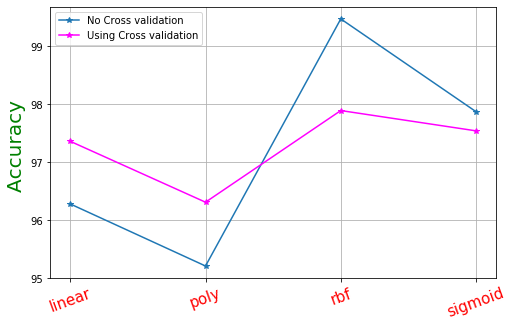

In [26]:
plt.figure(figsize= (8 , 5 ))
plt.plot(kernels , prev_kernel_accuracy , marker = "*" , label = "No Cross validation")
plt.plot(kernels , kernel_accuracy , marker = "*" ,  label = "Using Cross validation" ,  color = "magenta")
plt.xticks(color = "red" ,fontsize = 15 , rotation = 20  )
plt.ylabel("Accuracy " , color = "green" , fontsize = 20)
plt.legend() 
plt.grid(True)
plt.savefig("second_ana2.png")
plt.show()

# End of Second analysis